## Amazon Reviews Sentiment Analysis (NLP Project )

### category : Cell Phone & Accessories

### Importing Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

### Dataset

In [3]:
Data = pd.read_json(r"C:\Users\91983\Downloads\Amazon Review data set (Json)\Cell_Phones_and_Accessories_5.json" , lines = True)

In [4]:
Data.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

In [5]:
Data=Data.head(100000)
Data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [6]:
df = pd.DataFrame(Data.reviewText) 
df.head()

,reviewText
0,They look good and stick good! I just don't li...
1,These stickers work like the review says they ...
2,These are awesome and make my phone look so st...
3,Item arrived in great time and was in perfect ...
4,"awesome! stays on, and looks great. can be use..."


In [7]:
df.shape

(100000, 1)

### Data Cleaning & Data Preprocessing

### Steps :
1) Lower Case
2) Removing URL
3) Removing Punctuations
4) Removing Numbers
5) Removing Stopwords
6) Lemmitization
7) Removing Extra white space

### Converting Lower case

In [8]:
df.review = df.reviewText.str.lower()
df.iloc[1,0]

'These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :)'

### Removing URL

In [9]:
df.review = df.reviewText.str.replace(r'http\S+|www.\S+',"", case = False)
df.iloc[1,0]

'These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :)'

### Removing Punctuations

In [10]:
import string
string.punctuation

def remove_punctuation(abc):
    text_nopunt="".join([c  
                         for c in abc  
                         if c not in string.punctuation])
    return text_nopunt

In [11]:
df.review = df.reviewText.apply(lambda x : remove_punctuation(x))
df.iloc[1,0]

'These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :)'

### Removing Numbers

In [12]:
df['review'] = df['reviewText'].str.replace('\d+','')  # data.text  or data['text']
df.iloc[1,0]

'These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :)'

### Lemmitization

In [13]:
from nltk.stem import WordNetLemmatizer 
import nltk

lemmatizer = WordNetLemmatizer() # ASSIGNING
word_tokenizer = nltk.tokenize.WhitespaceTokenizer() 

In [14]:
def lemmatize_review(reviewText):
    return [lemmatizer.lemmatize(w,"v") 
            for w in word_tokenizer.tokenize(reviewText)]

In [15]:
df.review = df.reviewText.apply(lambda x :' '.join(lemmatize_review(x)))
df.iloc[1,0]

'These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :)'

### Stripping Extra White Space

In [16]:
df['reviewText'] = (df['reviewText'].astype("str").str.rstrip())
df.iloc[1,0]

'These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :)'

## Second Round of Cleaning

In [17]:
import re 
words = set(nltk.corpus.words.words())
def clean_text_round2(reviewText):
    reviewText =  re.sub(r"\b[a-zA-Z]\b", "", reviewText)
    reviewText =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", reviewText) 
    reviewText =  re.sub(r"phone", "", reviewText) 
    reviewText =  re.sub(r"case", "", reviewText) 
    reviewText =  re.sub(r"screen", "", reviewText) 
    reviewText =  re.sub(r"battery", "", reviewText) 
    reviewText =  re.sub(r"charge", "", reviewText) 
    reviewText =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(reviewText)  
                      if w.lower() in words)     
    
    return reviewText

In [18]:
df['reviewText']=df['reviewText'].apply(lambda x : clean_text_round2(x))

df = pd.DataFrame(df.reviewText.apply(lambda x: clean_text_round2(x)))
df.iloc[1,0]

'These stickers work like the review they They stick great and they stay the They are super stylish and can share them with sister'

In [19]:
df.head()

,reviewText
0,They look good and stick good just don like th...
1,These stickers work like the review they They ...
2,These are awesome and make look stylish have o...
3,Item great time and was perfect condition Howe...
4,awesome stays and great can used multiple appl...


### Term-Document Matrix

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming df1 is your DataFrame with a column named 'reviewText' containing text data

# Create a CountVectorizer object and exclude common English stop words
cv = CountVectorizer(stop_words='english', max_features=5000)  # Limiting the number of features for illustration

# Fit and transform the 'reviewText' column to create a sparse document-term matrix
data_cv = cv.fit_transform(df.reviewText)

# Convert the sparse matrix to a DataFrame with feature names as columns
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())

# Transpose the DataFrame to create a term-document matrix
tdm = data_dtm.transpose()

# Display the first few rows of the term-document matrix
tdm.head()


,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
abandoned,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abrasive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abroad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
tdm['frequency'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,99991,99992,99993,99994,99995,99996,99997,99998,99999,frequency
abandoned,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,938
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5327
abrasive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
abroad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,53


In [22]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,99991,99992,99993,99994,99995,99996,99997,99998,99999,frequency
0,abandoned,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
1,ability,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,938
2,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5327
3,abrasive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22
4,abroad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,53


In [23]:
tdm1 = tdm[["index","frequency"]] 
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING 
tdm1.sort_values(by='frequency',ascending=False,inplace=True) # SORTING DATA 
tdm1.head(10)

,Word,frequency
2481,like,35064
1906,great,34473
4730,use,32484
2340,just,31084
1877,good,30389
3273,product,19560
4472,time,19047
4950,works,18862
3408,really,18442
1263,does,16383


In [24]:
tdm1.shape

(5000, 2)

In [25]:
w = tdm1[tdm1["frequency"] >50]
w

,Word,frequency
2481,like,35064
1906,great,34473
4730,use,32484
2340,just,31084
1877,good,30389
...,...,...
1689,floppy,51
1939,guitar,51
1451,estate,51
2039,hiss,51


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [28]:
text = " ".join(review for review in df.reviewText)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 31127439 words in the combination of all review.


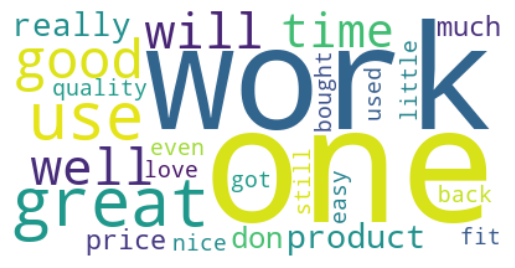

In [29]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
abc = WordCloud(stopwords=stopwords,
                      background_color="white",
                      collocations=False,
                      mode="RGBA",
                      max_words=25).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(abc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Sentiment Analysis

In [30]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [31]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity #polarity range -1 to +1
df['polarity'] = df['reviewText'].apply(pol)
df.head(5)

,reviewText,polarity
0,They look good and stick good just don like th...,0.333333
1,These stickers work like the review they They ...,0.544444
2,These are awesome and make look stylish have o...,0.480000
3,Item great time and was perfect condition Howe...,0.600000
4,awesome stays and great can used multiple appl...,0.360000


In [32]:
import numpy as np
df['Sentiment'] = np.where(df['polarity']>= 0, 'Positive', 'Negative')
df.head()

,reviewText,polarity,Sentiment
0,They look good and stick good just don like th...,0.333333,Positive
1,These stickers work like the review they They ...,0.544444,Positive
2,These are awesome and make look stylish have o...,0.480000,Positive
3,Item great time and was perfect condition Howe...,0.600000,Positive
4,awesome stays and great can used multiple appl...,0.360000,Positive


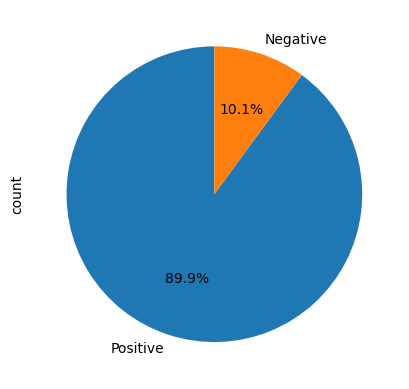

In [33]:
df.Sentiment.value_counts().plot.pie(autopct="%1.1f%%",startangle=90);

### Model Building

In [34]:
df_new = df.drop(['polarity'],axis=1)
df_new.head()

,reviewText,Sentiment
0,They look good and stick good just don like th...,Positive
1,These stickers work like the review they They ...,Positive
2,These are awesome and make look stylish have o...,Positive
3,Item great time and was perfect condition Howe...,Positive
4,awesome stays and great can used multiple appl...,Positive


In [35]:
#data is the original/main dataset
Data['sentiment'] = df.Sentiment

In [36]:
Data.head(1)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014",Positive


In [37]:
Data.shape

(100000, 10)

In [38]:
#adding Y variable which is sentiment
data_dtm['Sentiment'] = Data.sentiment
data_dtm.head()

,abandoned,ability,able,abrasive,abroad,absence,absent,absolute,absolutely,absorb,...,young,younger,yuck,zebra,zero,zip,zipper,zone,zoom,Sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive


### Model Building¶

### Logistic Regression

### Data Partition

In [39]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
X = data_dtm.drop(['Sentiment'],axis=1)
Y = data_dtm['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=231)

In [40]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
output = logreg.fit(X_train, y_train) # model = output
output

LogisticRegression()

In [41]:
X_train

,abandoned,ability,able,abrasive,abroad,absence,absent,absolute,absolutely,absorb,...,york,young,younger,yuck,zebra,zero,zip,zipper,zone,zoom
44036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93774,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57099,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Prediction on Train Data

In [42]:
train1 = pd.concat([X_train,y_train],axis=1)
train1.head()

,abandoned,ability,able,abrasive,abroad,absence,absent,absolute,absolutely,absorb,...,young,younger,yuck,zebra,zero,zip,zipper,zone,zoom,Sentiment
44036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
93774,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
2970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
14401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Positive


In [43]:
train1['Predicted'] = output.predict(X_train)
train1.head()

,abandoned,ability,able,abrasive,abroad,absence,absent,absolute,absolutely,absorb,...,younger,yuck,zebra,zero,zip,zipper,zone,zoom,Sentiment,Predicted
44036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
93774,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
2970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
14401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,Positive,Positive


### Classification Report of Train:

In [44]:
from sklearn.metrics import classification_report
print(classification_report(train1['Predicted'],train1['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.64      0.88      0.74      5146
    Positive       0.99      0.96      0.98     64854

    accuracy                           0.95     70000
   macro avg       0.82      0.92      0.86     70000
weighted avg       0.96      0.95      0.96     70000



### Prediction on Test Data

In [45]:
test1 = pd.concat([X_test,y_test],axis=1)
test1.head()

,abandoned,ability,able,abrasive,abroad,absence,absent,absolute,absolutely,absorb,...,young,younger,yuck,zebra,zero,zip,zipper,zone,zoom,Sentiment
74998,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Positive
34661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
80637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
54605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
39883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive


In [46]:
test1['Predicted'] = output.predict(X_test) 
test1.head()

,abandoned,ability,able,abrasive,abroad,absence,absent,absolute,absolutely,absorb,...,younger,yuck,zebra,zero,zip,zipper,zone,zoom,Sentiment,Predicted
74998,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,Positive,Positive
34661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
80637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
54605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
39883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive


### Classification Report of Test:

In [47]:
print(classification_report(test1['Predicted'],test1['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.54      0.76      0.63      2141
    Positive       0.98      0.95      0.97     27859

    accuracy                           0.94     30000
   macro avg       0.76      0.86      0.80     30000
weighted avg       0.95      0.94      0.94     30000



## Logistic Regression:

### Train Accuracy : 95%
### Test Accuracy : 94%

## Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini',
                                 min_samples_leaf=10, ## child
                                 min_samples_split=20, #parent 
                                 max_depth=4)  #branches)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=20)

In [49]:
features=cv.get_feature_names_out()

In [50]:
features = features.tolist()  #converting array into list

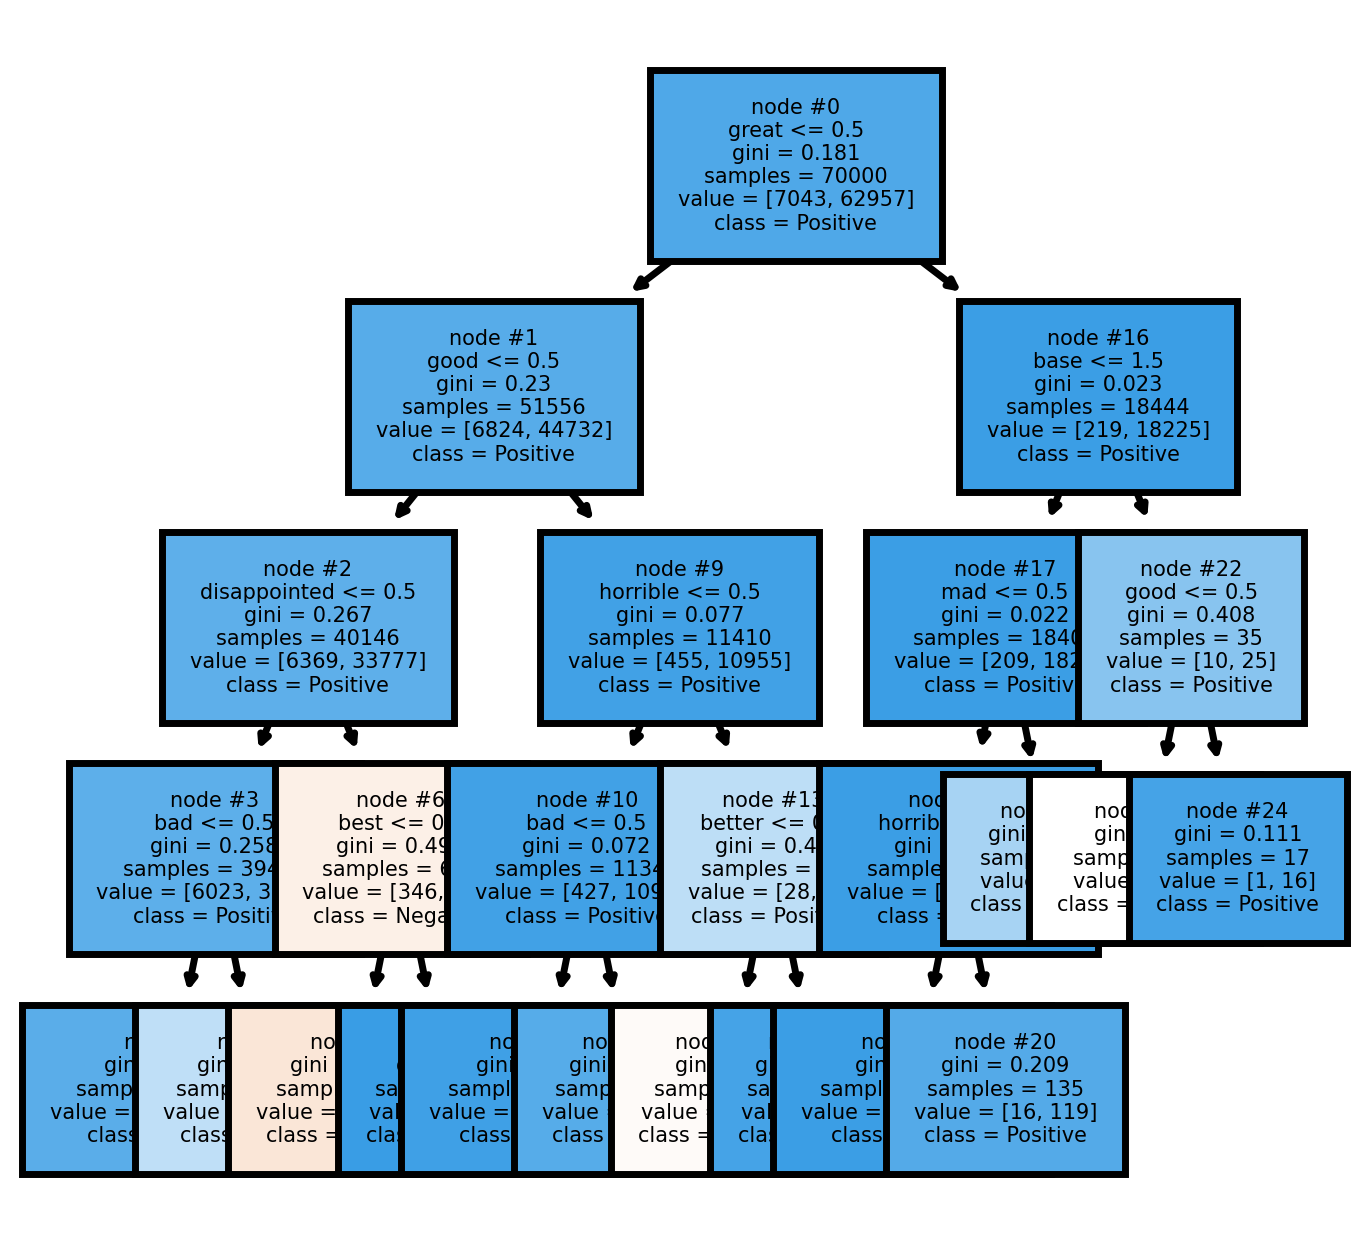

In [51]:
from sklearn import tree
import matplotlib.pyplot as plt
sentiment=['Negative', 'Positive']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=500)
tree.plot_tree(classifier,
               feature_names = features, 
               class_names = sentiment,
               filled = True,
              node_ids=True,
              fontsize=3);

### Prediction on Train data

In [52]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,abandoned,ability,able,abrasive,abroad,absence,absent,absolute,absolutely,absorb,...,young,younger,yuck,zebra,zero,zip,zipper,zone,zoom,Sentiment
44036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
93774,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
2970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
14401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Positive


In [53]:
train['Predicted'] = classifier.predict(X_train)
train.head()

,abandoned,ability,able,abrasive,abroad,absence,absent,absolute,absolutely,absorb,...,younger,yuck,zebra,zero,zip,zipper,zone,zoom,Sentiment,Predicted
44036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
93774,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
2970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
14401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,Positive,Positive


### Classification Report of Train:

In [54]:
from sklearn.metrics import classification_report
print(classification_report(train['Predicted'],train['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.05      0.55      0.10       693
    Positive       1.00      0.90      0.95     69307

    accuracy                           0.90     70000
   macro avg       0.52      0.73      0.52     70000
weighted avg       0.99      0.90      0.94     70000



### Prediction on Test data

In [55]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,abandoned,ability,able,abrasive,abroad,absence,absent,absolute,absolutely,absorb,...,young,younger,yuck,zebra,zero,zip,zipper,zone,zoom,Sentiment
74998,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Positive
34661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
80637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
54605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
39883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive


In [56]:
test['Predicted'] = classifier.predict(X_test)
test.head()

,abandoned,ability,able,abrasive,abroad,absence,absent,absolute,absolutely,absorb,...,younger,yuck,zebra,zero,zip,zipper,zone,zoom,Sentiment,Predicted
74998,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,Positive,Positive
34661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
80637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
54605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive
39883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Positive


### Classification Report of Test:

In [57]:
print(classification_report(test['Predicted'],test['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.05      0.55      0.10       300
    Positive       0.99      0.90      0.95     29700

    accuracy                           0.90     30000
   macro avg       0.52      0.73      0.52     30000
weighted avg       0.99      0.90      0.94     30000



 ### Decision Tree:
 
#### Train Accuracy : 90%
#### Test Accuracy : 90%

## Conclusion

### Decision Tree:

### Train : 90%
### Test : 90%

### Logistic Regression:

### Train : 95%
### Test : 94%

## END